In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the data
df1 = pd.read_csv('train_csv.csv')
df2 = pd.read_csv('test_csv.csv')

In [3]:
#Viewing the data
df1.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [4]:
#checking the datatype of features
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
id         80 non-null int64
time       80 non-null object
feature    80 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [5]:
#changing to datatype to datatime
df1['time'] = pd.to_datetime(df1['time'])

In [6]:
#Deleting unnecessay columns
df1.drop(['id'],axis=1,inplace=True)

In [7]:
df1.head()

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


In [8]:
df1 = df1.set_index('time')

In [9]:
df1.index.min()

Timestamp('2019-03-19 00:00:00')

In [10]:
df1.index.max()

Timestamp('2019-03-19 00:13:10')

In [11]:
y = df1

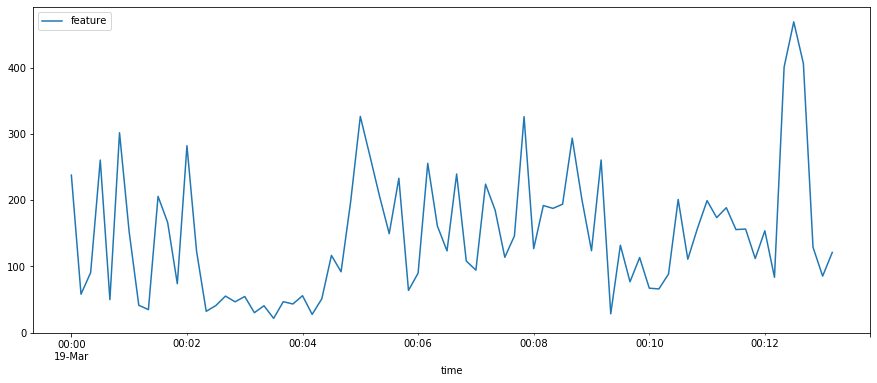

In [12]:
#Visualizing the data
y.plot(figsize=(15,6))

In [13]:
from pylab import rcParams
import itertools
import statsmodels.api as sm

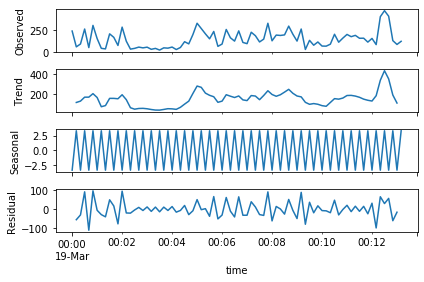

In [14]:
#Time series decomposition
decomposition = sm.tsa.seasonal_decompose(y,model='additive',freq=2)
fig = decomposition.plot()
plt.show()

In [15]:
#Time series forecasting with ARIMA
p=d=q=range(0,2)
pdq= list(itertools.product(p,d,q))
seasonal_pdq = [[x[0],x[1],x[2],12]for x in list(itertools.product(p,d,q))]

In [16]:
for params in pdq:
    for params_seasonal in seasonal_pdq:
        try:
            model=sm.tsa.statespace.SARIMAX(y['feature'],order=params,seasonal_order=params_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = model.fit()
            print("ARIMA{}*{}12_AIC:{}".format(params,params_seasonal,results.aic))
        except:
            continue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)*[0, 0, 0, 12]12_AIC:1042.4035372531396
ARIMA(0, 0, 0)*[0, 0, 1, 12]12_AIC:865.3374454694662
ARIMA(0, 0, 0)*[0, 1, 0, 12]12_AIC:848.4679420629242


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)*[0, 1, 1, 12]12_AIC:680.1241081994217
ARIMA(0, 0, 0)*[1, 0, 0, 12]12_AIC:856.5691270639311
ARIMA(0, 0, 0)*[1, 0, 1, 12]12_AIC:834.0048626489361
ARIMA(0, 0, 0)*[1, 1, 0, 12]12_AIC:696.4451555075179


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)*[1, 1, 1, 12]12_AIC:682.884902606035
ARIMA(0, 0, 1)*[0, 0, 0, 12]12_AIC:988.1740013827846
ARIMA(0, 0, 1)*[0, 0, 1, 12]12_AIC:821.6035769113852


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)*[0, 1, 0, 12]12_AIC:827.6027531426902


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)*[0, 1, 1, 12]12_AIC:663.1898764125704
ARIMA(0, 0, 1)*[1, 0, 0, 12]12_AIC:840.3962302357429


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)*[1, 0, 1, 12]12_AIC:816.393424768003
ARIMA(0, 0, 1)*[1, 1, 0, 12]12_AIC:691.7023215614105


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)*[1, 1, 1, 12]12_AIC:664.5347022243453
ARIMA(0, 1, 0)*[0, 0, 0, 12]12_AIC:951.5451699616596
ARIMA(0, 1, 0)*[0, 0, 1, 12]12_AIC:793.1447566476655
ARIMA(0, 1, 0)*[0, 1, 0, 12]12_AIC:842.9748509702757


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)*[0, 1, 1, 12]12_AIC:679.3622594391269
ARIMA(0, 1, 0)*[1, 0, 0, 12]12_AIC:806.8864531800438
ARIMA(0, 1, 0)*[1, 0, 1, 12]12_AIC:795.1311253254264
ARIMA(0, 1, 0)*[1, 1, 0, 12]12_AIC:693.1409735483899


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)*[1, 1, 1, 12]12_AIC:679.9553830648227
ARIMA(0, 1, 1)*[0, 0, 0, 12]12_AIC:922.9270370031405
ARIMA(0, 1, 1)*[0, 0, 1, 12]12_AIC:773.9770127319074


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)*[0, 1, 0, 12]12_AIC:816.680922393663


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)*[0, 1, 1, 12]12_AIC:657.0206616533706
ARIMA(0, 1, 1)*[1, 0, 0, 12]12_AIC:798.7330227046681


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)*[1, 0, 1, 12]12_AIC:775.907500255411
ARIMA(0, 1, 1)*[1, 1, 0, 12]12_AIC:682.5973886946354


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)*[1, 1, 1, 12]12_AIC:658.4755325123219
ARIMA(1, 0, 0)*[0, 0, 0, 12]12_AIC:959.0922663490547
ARIMA(1, 0, 0)*[0, 0, 1, 12]12_AIC:802.4108372185555
ARIMA(1, 0, 0)*[0, 1, 0, 12]12_AIC:835.2445375893043


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)*[0, 1, 1, 12]12_AIC:672.9459064348641
ARIMA(1, 0, 0)*[1, 0, 0, 12]12_AIC:802.3284155436245


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)*[1, 0, 1, 12]12_AIC:804.3237613689665
ARIMA(1, 0, 0)*[1, 1, 0, 12]12_AIC:674.6256243192662


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)*[1, 1, 1, 12]12_AIC:674.0438551739012
ARIMA(1, 0, 1)*[0, 0, 0, 12]12_AIC:936.0091469398242


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)*[0, 0, 1, 12]12_AIC:786.9506781962443
ARIMA(1, 0, 1)*[0, 1, 0, 12]12_AIC:823.7411832194099


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)*[0, 1, 1, 12]12_AIC:662.8421416400943
ARIMA(1, 0, 1)*[1, 0, 0, 12]12_AIC:801.3177834532555


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)*[1, 0, 1, 12]12_AIC:788.9242988963683


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)*[1, 1, 0, 12]12_AIC:675.6776028031151


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)*[1, 1, 1, 12]12_AIC:664.2167207938035
ARIMA(1, 1, 0)*[0, 0, 0, 12]12_AIC:943.3243763059057
ARIMA(1, 1, 0)*[0, 0, 1, 12]12_AIC:791.1975381930996
ARIMA(1, 1, 0)*[0, 1, 0, 12]12_AIC:834.3108600404383


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)*[0, 1, 1, 12]12_AIC:673.4936834044586
ARIMA(1, 1, 0)*[1, 0, 0, 12]12_AIC:791.192097282731


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)*[1, 0, 1, 12]12_AIC:793.1919205089002
ARIMA(1, 1, 0)*[1, 1, 0, 12]12_AIC:673.7956811232586


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)*[1, 1, 1, 12]12_AIC:674.5988516858234
ARIMA(1, 1, 1)*[0, 0, 0, 12]12_AIC:920.0437195270657


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)*[0, 0, 1, 12]12_AIC:770.5089472859027
ARIMA(1, 1, 1)*[0, 1, 0, 12]12_AIC:816.2638641863066


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)*[0, 1, 1, 12]12_AIC:655.9403928754092
ARIMA(1, 1, 1)*[1, 0, 0, 12]12_AIC:782.123850897916


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)*[1, 0, 1, 12]12_AIC:772.2841551414185


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)*[1, 1, 0, 12]12_AIC:669.0014501675847


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)*[1, 1, 1, 12]12_AIC:657.6512317786139


In [17]:
model =sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)

results = model.fit()

print(results.summary().tables[1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4069      0.149      2.730      0.006       0.115       0.699
ma.L1         -1.0000    344.027     -0.003      0.998    -675.280     673.280
ar.S.L12      -0.4375      0.160     -2.738      0.006      -0.751      -0.124
sigma2      1.155e+04   3.98e+06      0.003      0.998   -7.78e+06     7.8e+06


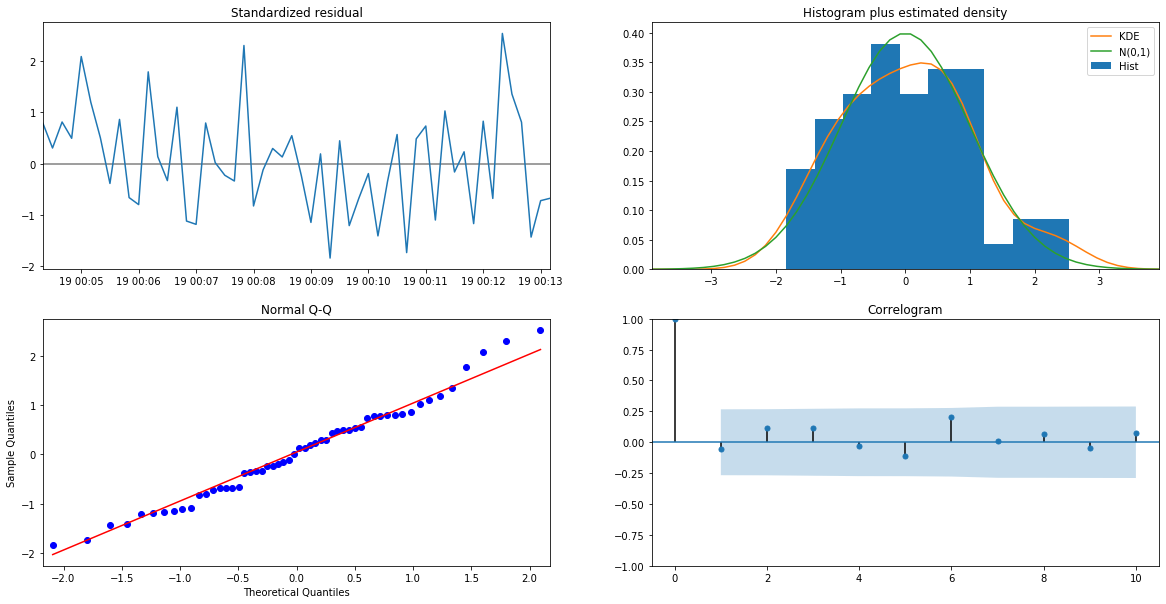

In [18]:
results.plot_diagnostics(figsize=(20,10))
plt.show()

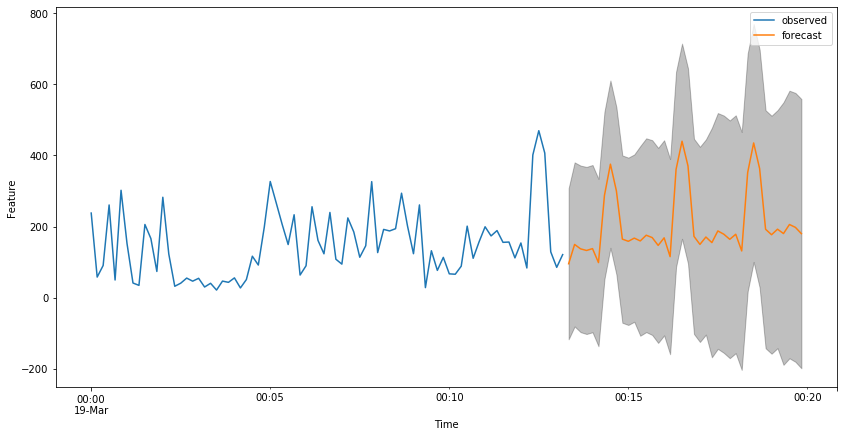

In [19]:
#Validating forecast
prediction_uc = results.get_forecast(steps=40)
prediction_ci = prediction_uc.conf_int()
ax = y['feature'].plot(label='observed',figsize=(14,7))
prediction_uc.predicted_mean.plot(ax=ax,label='forecast')
ax.fill_between(prediction_ci.index,prediction_ci.iloc[ : ,0],prediction_ci.iloc[ : ,1],color ='k',alpha=0.25)
ax.set_xlabel('Time')
ax.set_ylabel('Feature')
plt.legend()
plt.show()

In [20]:
pred = results.get_prediction(start=pd.to_datetime('2019-03-19 00:10:00'), dynamic=False)
y_forecasted = pred.predicted_mean
y_truth = y['feature']['2019-03-19 00:10:00':]

#Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 13555.92


In [21]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 116.43


In [22]:
prediction_uc.predicted_mean

2019-03-19 00:13:20     95.432577
2019-03-19 00:13:30    149.746435
2019-03-19 00:13:40    137.254258
2019-03-19 00:13:50    132.779455
2019-03-19 00:14:00    137.937257
2019-03-19 00:14:10     98.650361
2019-03-19 00:14:20    287.653258
2019-03-19 00:14:30    375.499627
2019-03-19 00:14:40    300.609910
2019-03-19 00:14:50    164.716250
2019-03-19 00:15:00    158.561597
2019-03-19 00:15:10    167.500423
2019-03-19 00:15:20    159.603820
2019-03-19 00:15:30    175.683933
2019-03-19 00:15:40    169.025406
2019-03-19 00:15:50    147.016021
2019-03-19 00:16:00    168.258953
2019-03-19 00:16:10    115.393714
2019-03-19 00:16:20    360.803566
2019-03-19 00:16:30    440.093159
2019-03-19 00:16:40    370.436350
2019-03-19 00:16:50    172.417371
2019-03-19 00:17:00    149.865591
2019-03-19 00:17:10    170.574874
2019-03-19 00:17:20    154.893999
2019-03-19 00:17:30    187.703070
2019-03-19 00:17:40    178.492063
2019-03-19 00:17:50    164.154835
2019-03-19 00:18:00    178.359809
2019-03-19 00:

In [23]:
#Converting y_pred to a dataframe which is an array
ytest= pd.DataFrame(prediction_uc.predicted_mean)

In [24]:
ytest.head()

,0
2019-03-19 00:13:20,95.432577
2019-03-19 00:13:30,149.746435
2019-03-19 00:13:40,137.254258
2019-03-19 00:13:50,132.779455
2019-03-19 00:14:00,137.937257


In [25]:
#reseting index
ytest = ytest.reset_index(drop=True)

In [26]:
ytest.head()

,0
0,95.432577
1,149.746435
2,137.254258
3,132.779455
4,137.937257


In [27]:
df2.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [28]:
#Converting the datatype to datetime
df2['time'] = pd.to_datetime(df2['time'])

In [29]:
#Concating 
test_pred = pd.concat([df2,ytest],axis=1)

In [30]:
test_pred.head()

,id,time,0
0,80,2019-03-19 00:13:20,95.432577
1,81,2019-03-19 00:13:30,149.746435
2,82,2019-03-19 00:13:40,137.254258
3,83,2019-03-19 00:13:50,132.779455
4,84,2019-03-19 00:14:00,137.937257


In [31]:
#Naming the columns
test_pred= test_pred.rename(columns={0:'feature'})

In [32]:
#Deleting unnecessary columns
test_pred.drop(['time'] ,axis=1,inplace=True)

In [33]:
test_pred.head()

,id,feature
0,80,95.432577
1,81,149.746435
2,82,137.254258
3,83,132.779455
4,84,137.937257
